In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 실습1(타이타닉 생존자체크)

In [12]:
df_titanic = pd.read_csv('titanic_train.csv')

In [13]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
df_titanic['Cabin'] = df_titanic['Cabin'].fillna('N')
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('N')

In [6]:
conlist = [(df_titanic['Age']<10),
((df_titanic['Age']>=10) & (df_titanic['Age']<20)),
((df_titanic['Age']>=20) & (df_titanic['Age']<30)),
((df_titanic['Age']>=30) & (df_titanic['Age']<40)),
((df_titanic['Age']>=40) & (df_titanic['Age']<50)),
((df_titanic['Age']>=50) & (df_titanic['Age']<60)),
((df_titanic['Age']>=60) & (df_titanic['Age']<70)),
(df_titanic['Age'])>=70]

choilist =['유아','10대','20대','30대','40대','50대','60대','노인']

df_titanic["Ages"] = np.select(conlist,choilist,default='Not Specified')

df_titanic.groupby('Ages').mean()['Survived']

Ages
10대    0.401961
20대    0.324937
30대    0.437126
40대    0.382022
50대    0.416667
60대    0.315789
노인     0.142857
유아     0.612903
Name: Survived, dtype: float64

C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  

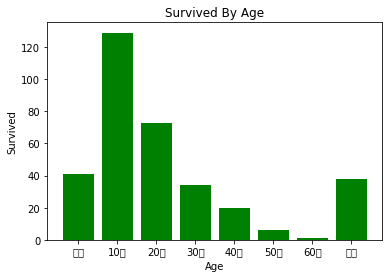

In [40]:
df_titanic_index = df_titanic.groupby('Ages').sum()['Survived']
df_titanic_index = df_titanic_index.reindex(['유아','10대', '20대', '30대', '40대', '50대', '60대', '노인'])
plt.bar(df_titanic_index.index, df_titanic.groupby('Ages').sum()['Survived'].values, color = 'g')
plt.title('Survived By Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


Text(0, 0.5, 'Survived')

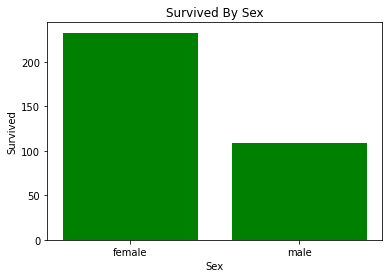

In [33]:
plt.bar(df_titanic.groupby('Sex').sum()['Survived'].index, df_titanic.groupby('Sex').sum()['Survived'].values, color = 'g')
plt.title('Survived By Sex')
plt.xlabel("Sex")
plt.ylabel('Survived')

# 실습2(코로나데이터)

In [4]:
corona = pd.read_csv("kr_daily.csv")
corona.head(20)

,date,confirmed,death,released,candidate,negative
0,20200121,1,0,0,0,0
1,20200122,1,0,0,0,0
2,20200123,1,0,0,0,0
3,20200124,2,0,0,0,0
4,20200125,2,0,0,0,0
5,20200126,2,0,0,0,0
6,20200127,4,0,0,57,0
7,20200128,4,0,0,57,0
8,20200129,4,0,0,183,0
9,20200130,7,0,0,240,0


In [5]:
corona['date']

0      20200121
1      20200122
2      20200123
3      20200124
4      20200125
         ...   
128    20200528
129    20200529
130    20200530
131    20200531
132    20200601
Name: date, Length: 133, dtype: int64

In [6]:
corona['date'] = corona['date'].astype(str)
corona['date'] = pd.to_datetime(corona['date'])
print(corona['date'])

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
128   2020-05-28
129   2020-05-29
130   2020-05-30
131   2020-05-31
132   2020-06-01
Name: date, Length: 133, dtype: datetime64[ns]


In [7]:
corona.index = corona['date']
corona

,date,confirmed,death,released,candidate,negative
date,,,,,,
2020-01-21,2020-01-21,1,0,0,0,0
2020-01-22,2020-01-22,1,0,0,0,0
2020-01-23,2020-01-23,1,0,0,0,0
2020-01-24,2020-01-24,2,0,0,0,0
2020-01-25,2020-01-25,2,0,0,0,0
...,...,...,...,...,...,...
2020-05-28,2020-05-28,11344,269,10340,857322,834952
2020-05-29,2020-05-29,11402,269,10363,873718,849161
2020-05-30,2020-05-30,11441,269,10398,891460,865162


C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ksg53\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  

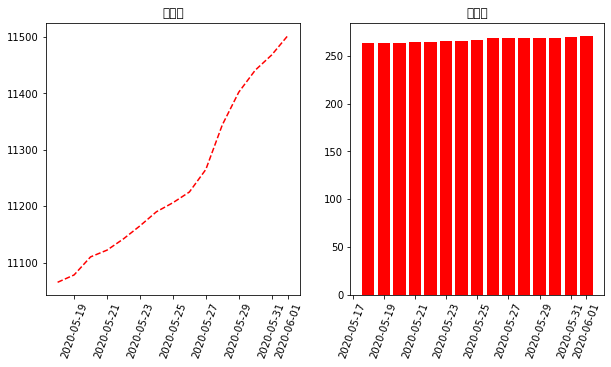

In [74]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('확진자')
plt.xticks(rotation=70)
plt.plot(corona['2020-05-18':].index, corona['2020-05-18':]['confirmed'].values, color='red', linestyle='dashed')

plt.subplot(122)
plt.title('사망자')
plt.xticks(rotation=70)
plt.bar(corona['2020-05-18':].index, corona['2020-05-18':]['death'].values, color='red', linestyle='dashed')

plt.show()